# Activity 09 - $k$-Nearest Neighbor

***
##### CS 434 - Dating Mining and Machine Learning
##### Oregon State University-Cascades
***

# Load packages

In [0]:
import ssl
import math 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from scipy.stats.stats import pearsonr, spearmanr
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
ssl._create_default_https_context = ssl._create_unverified_context

# Dataset

[UCI Yeast Dataset](http://archive.ics.uci.edu/ml/datasets/Yeast)

Predicted Attribute: Localization site of protein. ( non-numeric ).

### Features
* **Sequence Name**: Accession number for the SWISS-PROT database
* **mcg**: McGeoch's method for signal sequence recognition.
* **gvh**: von Heijne's method for signal sequence recognition.
* **alm**: Score of the ALOM membrane spanning region prediction program.
* **mit**: Score of discriminant analysis of the amino acid content of the N-terminal region (20 residues long) of mitochondrial and non-mitochondrial proteins.
* **erl**: Presence of "HDEL" substring (thought to act as a signal for retention in the endoplasmic reticulum lumen). Binary attribute.
* **pox**: Peroxisomal targeting signal in the C-terminus.
* **vac**: Score of discriminant analysis of the amino acid content of vacuolar and extracellular proteins.

### Class label
* **nuc**: Score of discriminant analysis of nuclear localization signals of nuclear and non-nuclear proteins.

> Note: this is a hard dataset.  The best reported result is $F_1$ = `0.608`. (src: [Table 4](https://arxiv.org/ftp/arxiv/papers/1703/1703.08283.pdf))

In [0]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data'
header=['sequence','mcg','gvh','alm','mit','erl','pox','vac','nuc']

*** 
# Exercise #1 - Load data
*** 

##### 1.1 Read the url into new dataframe `df`.

* mind your delimiter
* take the first column as row index (default)

In [25]:
# read the url into df
df = pd.read_csv(url, header=None, sep='\s+', index_col=0)
df.columns = header
df

,sequence,mcg,gvh,alm,mit,erl,pox,vac,nuc
0,,,,,,,,,
ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...,...
YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2


##### 1.2 Describe your data


In [28]:
# describe the dataset
df.describe()

,sequence,mcg,gvh,alm,mit,erl,pox,vac
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


*** 
# Exercise #2 - Prepare the experiment
***

##### 2.1 Split `X` and `y`

In [29]:
# split to X and y
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values
print(X.shape, y.shape)

(1484, 8) (1484,)


##### 2.2 Partition to train and test sets

* test proportion of 20%
* `random_state=1`
* stratify by `y`

In [0]:
# partition to train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)

##### 2.3 Print the shapes of your four sets

In [31]:
# print shapes of train and test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1187, 8) (297, 8) (1187,) (297,)


##### 2.4 Experiment to train and test model

Complete the function to:
1. Build [$k$-NN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) model with Euclidean distance
1. Train the model
1. Test the model and save prediction as `y_pred`
1. Calculate `score`
1. Return the `score` and `y_pred`

In [0]:
def train_and_test(X_train, X_test, y_train, y_test, k=5):
  # (1) build k-NN model
  knn = KNeighborsClassifier(n_neighbors=k, 
                           p=2, 
                           metric='minkowski')

  # (2) train the model
  knn.fit(X_train, y_train)

  # (3) test the model
  y_pred = knn.predict(X_test)

  # (4) calculate score
  score = accuracy_score(y_test, y_pred)

  # (5) return score and y_pred
  return score, y_pred

*** 
# Exercise #3 - Run the experiment
*** 

##### 3.1 Predict the test set
* use $k=11$
* save predictions as `y_pred`
* save score as `score`

In [47]:
# call your train_and_test function
score, y_pred = train_and_test(X_train, X_test, y_train, y_test, k=11)
print(score, y_pred)

0.5521885521885522 ['MIT' 'MIT' 'MIT' 'EXC' 'NUC' 'NUC' 'ME1' 'CYT' 'CYT' 'NUC' 'CYT' 'MIT'
 'ME3' 'ME3' 'CYT' 'ME1' 'MIT' 'MIT' 'CYT' 'CYT' 'CYT' 'MIT' 'MIT' 'CYT'
 'NUC' 'CYT' 'MIT' 'CYT' 'NUC' 'CYT' 'ME2' 'MIT' 'CYT' 'CYT' 'ME3' 'MIT'
 'CYT' 'MIT' 'ME1' 'NUC' 'ERL' 'ME3' 'CYT' 'ME2' 'MIT' 'CYT' 'ME1' 'MIT'
 'NUC' 'NUC' 'NUC' 'CYT' 'ME1' 'NUC' 'NUC' 'ME3' 'ME3' 'CYT' 'CYT' 'NUC'
 'ME3' 'NUC' 'CYT' 'CYT' 'CYT' 'NUC' 'CYT' 'NUC' 'ME2' 'EXC' 'CYT' 'ME3'
 'MIT' 'ME3' 'CYT' 'CYT' 'CYT' 'NUC' 'CYT' 'MIT' 'CYT' 'NUC' 'CYT' 'ME3'
 'CYT' 'CYT' 'NUC' 'ME3' 'NUC' 'ME3' 'NUC' 'NUC' 'ME1' 'NUC' 'NUC' 'NUC'
 'NUC' 'NUC' 'CYT' 'NUC' 'CYT' 'MIT' 'CYT' 'NUC' 'NUC' 'NUC' 'NUC' 'ME3'
 'CYT' 'NUC' 'CYT' 'NUC' 'NUC' 'CYT' 'MIT' 'NUC' 'CYT' 'MIT' 'ME3' 'CYT'
 'MIT' 'MIT' 'CYT' 'MIT' 'NUC' 'CYT' 'CYT' 'CYT' 'NUC' 'CYT' 'NUC' 'CYT'
 'CYT' 'NUC' 'CYT' 'ME1' 'NUC' 'CYT' 'NUC' 'ME3' 'NUC' 'CYT' 'NUC' 'MIT'
 'MIT' 'CYT' 'MIT' 'CYT' 'CYT' 'NUC' 'CYT' 'CYT' 'CYT' 'NUC' 'CYT' 'NUC'
 'POX' 'ME3' 'NUC' 'ME3' 'CYT' '

##### 3.2 Print your test score from result of Exercise `3.1`

In [48]:
# print the accuracy you returned in 3.1
score

0.5521885521885522

##### 3.3 Count the predictions by class label

In [54]:
# count the number of predictions by class
(unique, counts) = np.unique(y_pred, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[['CYT' 108]
 ['ERL' 1]
 ['EXC' 7]
 ['ME1' 12]
 ['ME2' 6]
 ['ME3' 31]
 ['MIT' 46]
 ['NUC' 83]
 ['POX' 3]]


##### 3.4 Graph a confusion matrix

[[55  0  0  0  0  0  8 30  0  0]
 [ 0  1  0  0  0  0  0  0  0  0]
 [ 0  0  4  2  1  0  0  0  0  0]
 [ 1  0  1  6  0  0  1  0  0  0]
 [ 1  0  0  3  2  3  1  0  0  0]
 [ 4  0  0  1  1 21  0  5  0  0]
 [15  0  0  0  0  2 29  2  1  0]
 [31  0  0  0  1  4  6 44  0  0]
 [ 0  0  1  0  0  0  1  0  2  0]
 [ 1  0  1  0  1  1  0  2  0  0]]


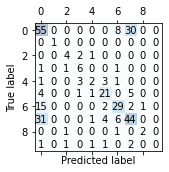

In [58]:
# graph a confusion matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)
# graph a confusion matrix
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

##### 3.5 Calculate precision, recall, and F$_1$

In [61]:
# precision, recall, and F1
# precision tp / (tp + fp)
y_true = y_test
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
print('Precision: %.3f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
print('Recall: %.3f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
print('F1 score: %.3f' % f1)

Precision: 0.542
Recall: 0.552
F1 score: 0.545


> The warning you see if because we didn't predict any instances for some of the classes.  Therefore `precision` gets a `0/0` in its calculation.  We want this `NaN` to be treated as `0`, which is the default behaviour (with warning).  
>
>To suppress the warning, add the parameter `zero_division=0`.  But in most cases, it's useful to be reminded that we aren't predicting all labels. 

*** 
# Exercise #4 - Select the best $k$ by math
*** 

> Before lazily asking someone what to do here, review the lecture and/or textbook.

##### 4.1 Calculate an "informed" value of $k$ using the math approach

* calculate it; don't just hard-code a number
* save as variable `k`
* round to nearest *odd* number

In [64]:
# calculate k
grid_params = {
    'n_neighbors' : list(range(1, 21, 2)),
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean','manhattan','chebyshev']
}

# construct a grid search 
gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    cv = 3,
    n_jobs = -1
)

# run the grid search
gs_results = gs.fit(X_train, y_train)
k = gs_results.best_params_

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    2.1s finished


##### 4.2 Print $k$

In [65]:
# print k
print(k)

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}


##### 4.3 Call `train_and_test` with your value of $k$

In [66]:
# call train_and_test with your new k
train_and_test(X_train, X_test, y_train, y_test, k = 15)

(0.5892255892255892,
 array(['MIT', 'MIT', 'MIT', 'EXC', 'NUC', 'NUC', 'ME1', 'CYT', 'CYT',
        'NUC', 'CYT', 'MIT', 'ME3', 'ME3', 'CYT', 'ME1', 'MIT', 'MIT',
        'CYT', 'CYT', 'CYT', 'MIT', 'MIT', 'CYT', 'NUC', 'CYT', 'MIT',
        'CYT', 'NUC', 'CYT', 'MIT', 'MIT', 'CYT', 'CYT', 'ME3', 'MIT',
        'CYT', 'MIT', 'ME1', 'NUC', 'ME2', 'ME3', 'CYT', 'ME2', 'CYT',
        'CYT', 'ME1', 'MIT', 'NUC', 'NUC', 'NUC', 'CYT', 'ME1', 'NUC',
        'NUC', 'ME3', 'ME3', 'CYT', 'CYT', 'NUC', 'ME3', 'NUC', 'CYT',
        'CYT', 'MIT', 'CYT', 'CYT', 'NUC', 'ME2', 'EXC', 'CYT', 'ME3',
        'MIT', 'ME3', 'CYT', 'CYT', 'CYT', 'CYT', 'NUC', 'MIT', 'CYT',
        'NUC', 'CYT', 'ME3', 'ME3', 'CYT', 'NUC', 'ME3', 'NUC', 'ME3',
        'NUC', 'NUC', 'ME1', 'NUC', 'NUC', 'NUC', 'NUC', 'NUC', 'CYT',
        'NUC', 'CYT', 'MIT', 'CYT', 'NUC', 'NUC', 'NUC', 'NUC', 'ME3',
        'CYT', 'NUC', 'NUC', 'NUC', 'NUC', 'CYT', 'MIT', 'NUC', 'CYT',
        'MIT', 'ME3', 'CYT', 'MIT', 'MIT', 'CYT', 'MIT',

*** 
# Exercise #5 - Select $k$ by experiment
*** 

##### 5.1 Select the best $k$ by exeriment

* run $k$ = 1 to 99
* only check odd values of $k$
* train_and_test each $k$
* save the score in list `k_results`

In [0]:
# run k = 1 to 99 and save results
k_results = []
for i in range(100):
  if i%2 != 0:
    score, _ = train_and_test(X_train, X_test, y_train, y_test, k = i)
    k_results.append(score)

##### 5.2 Plot $k$ vs score

* x-axis is $k$ from 1 to 99 (odds)
* y-axis is the respective score
* label your graph

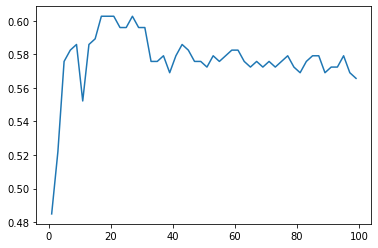

In [77]:
# graph k against the respective score
x = [i for i in range(100) if i%2 != 0]
plt.plot(x, k_results)
plt.show()

##### 5.3 Find the best $k$

* iterate over your values of $k$
* print the value $k$, a tab `\t`, and the respective score
* use `.format` notation
* format your floats (to six places, the default for `:f`)
* your numbers should line up (width) with the header

In [82]:
# print accuracy for each k
print('k\taccuracy\n================')
for i in range(len(k_results)):
  print(i + 1, '\t', k_results[i])

print(max(k_results))

k	accuracy
1 	 0.48484848484848486
2 	 0.5218855218855218
3 	 0.5757575757575758
4 	 0.5824915824915825
5 	 0.5858585858585859
6 	 0.5521885521885522
7 	 0.5858585858585859
8 	 0.5892255892255892
9 	 0.6026936026936027
10 	 0.6026936026936027
11 	 0.6026936026936027
12 	 0.5959595959595959
13 	 0.5959595959595959
14 	 0.6026936026936027
15 	 0.5959595959595959
16 	 0.5959595959595959
17 	 0.5757575757575758
18 	 0.5757575757575758
19 	 0.5791245791245792
20 	 0.569023569023569
21 	 0.5791245791245792
22 	 0.5858585858585859
23 	 0.5824915824915825
24 	 0.5757575757575758
25 	 0.5757575757575758
26 	 0.5723905723905723
27 	 0.5791245791245792
28 	 0.5757575757575758
29 	 0.5791245791245792
30 	 0.5824915824915825
31 	 0.5824915824915825
32 	 0.5757575757575758
33 	 0.5723905723905723
34 	 0.5757575757575758
35 	 0.5723905723905723
36 	 0.5757575757575758
37 	 0.5723905723905723
38 	 0.5757575757575758
39 	 0.5791245791245792
40 	 0.5723905723905723
41 	 0.569023569023569
42 	 0.57575757

##### 5.4 Print the average score across all `k`'s

In [81]:
# average score of the k_results
mean = sum(k_results)/len(k_results)
mean

0.5769023569023564

> This doesn't tell us anything useful or informative, but it's a Canvas questions nevertheless. 

##### 5.5 Train vs. Validation vs. Test

> Note: In the above section we calculated the best `k` by viewing performance on the `test` set.  This is fine for our learning purposes and can be informative. However, in a true experiment, this would be *cheating* because we used the `test` set to learn a parameter for our model.
>
>  The proper way is to divide the `train` set into `train'` and `validation` sets. We then train on `train'` and use the `validation` set to test our model while exploring the values of $k$. After selecting a final $k$, we retrain the model on the original `train` set, and evaluate with the held-out `test` set. 

<img src="https://66.media.tumblr.com/dded9d1a2bf2068f92af9f7a9b6b5451/tumblr_p6s3hbPzgV1vd8jsjo1_500.gifv" width="300">